In [1]:
import json
import pandas as pd
from collections import defaultdict
from sklearn import linear_model
import numpy
import random
import gzip
import dateutil.parser
import math
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from collections import Counter
from datetime import datetime
import time

In [2]:
def parse(path):
    g = gzip.open(path, 'rt')
    for l in g:
        yield eval(l)

In [50]:
ratingsTime = []
for d in parse("ratebeer.json.gz"):
    required_keys = ['review/time', 'review/overall', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste']
    
    # Check if all required keys exist
    if all(key in d for key in required_keys):
        t = d['review/time']
        overall_rating = d['review/overall'].split('/')[0]
        appearance_rating = d['review/appearance'].split('/')[0]
        aroma_rating = d['review/aroma'].split('/')[0]
        palate_rating = d['review/palate'].split('/')[0]
        taste_rating = d['review/taste'].split('/')[0]

        # Optional: Convert ratings to integers, if applicable
        try:
            overall_rating = int(overall_rating)
            appearance_rating = int(appearance_rating)
            aroma_rating = int(aroma_rating)
            palate_rating = int(palate_rating)
            taste_rating = int(taste_rating)
        except ValueError:
            continue  # Skip thi s record if ratings are not valid integers

        ratingsTime.append((t, overall_rating, appearance_rating, aroma_rating, palate_rating, taste_rating))
    else:
        continue  # Skip this record if any of the required keys are missing


/var/folders/34/frjzs6wn5sg32448fcj0jh1w0000gn/T/ipykernel_45116/3391983956.py:12: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')


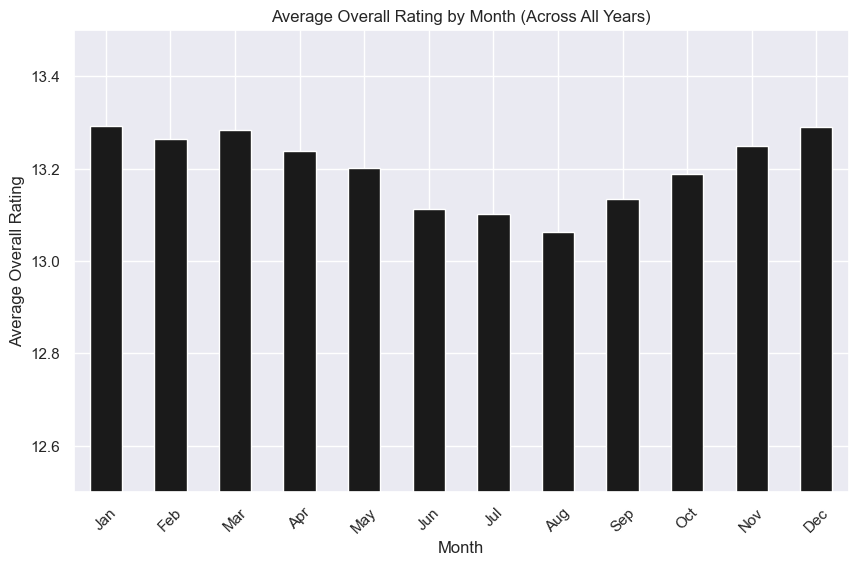

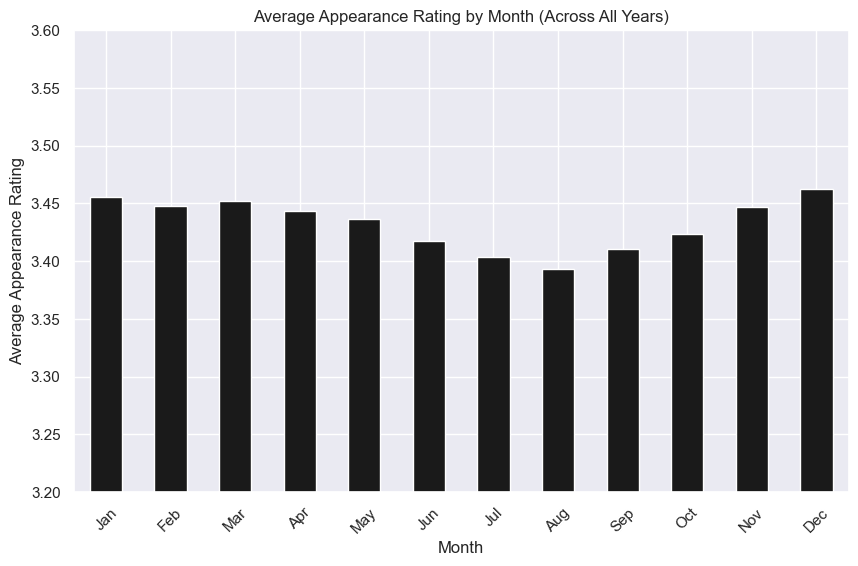

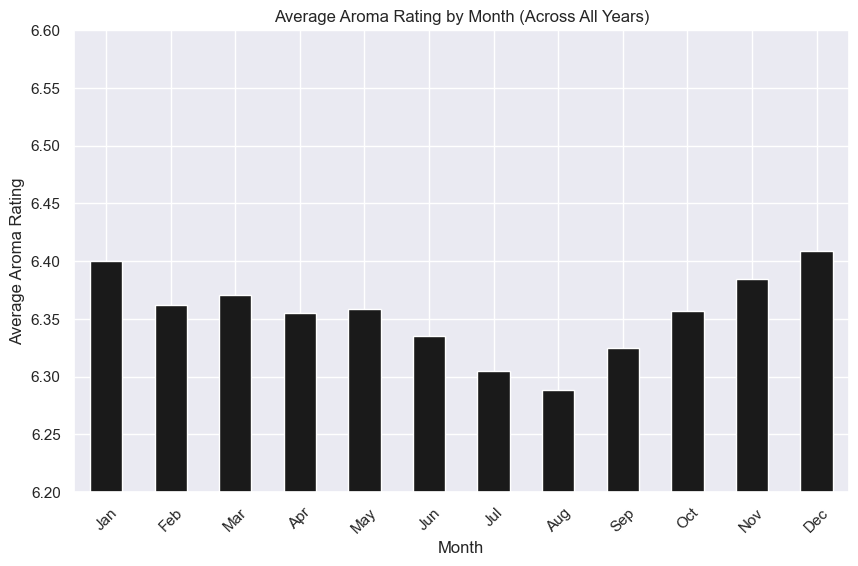

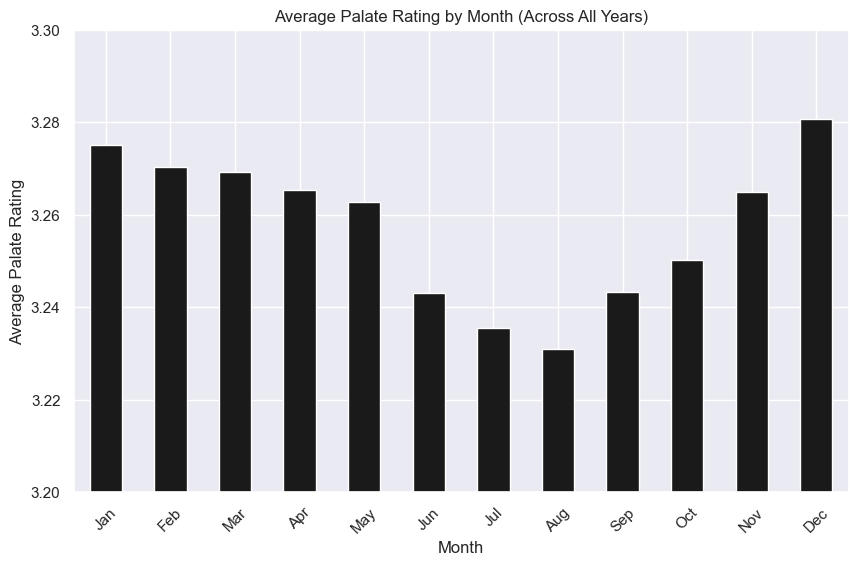

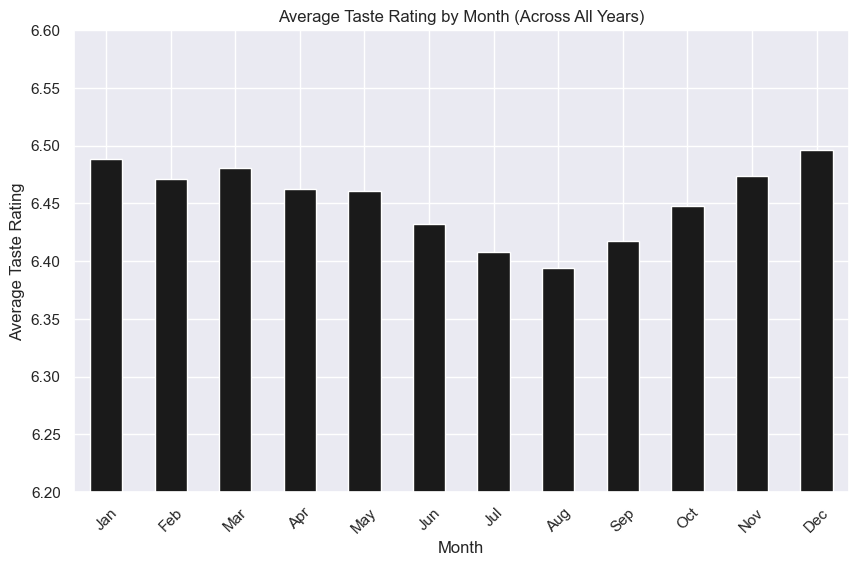

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_df = pd.DataFrame(ratingsTime, columns=['timestamp', 'overall', 'appearance', 'aroma', 'palate', 'taste'])
# Convert ratings to numeric types
rating_columns = ['overall', 'appearance', 'aroma', 'palate', 'taste']
for col in rating_columns:
    ratings_df[col] = pd.to_numeric(ratings_df[col], errors='coerce')
# Drop rows with NaN values in any of the rating columns
ratings_df.dropna(subset=rating_columns, inplace=True)
# Convert Unix timestamp to datetime
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
#
# Extract only the month from the timestamp
ratings_df['month'] = ratings_df['timestamp'].dt.month

### Plotting each rating category in a separate graph
#overall rating graph
monthly_avg = ratings_df.groupby('month')['overall'].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='k')
plt.title(f"Average Overall Rating by Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel(f"Average Overall Rating")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.ylim(12.5, 13.5)  
plt.grid(True)
plt.show()
#appearance graph
monthly_avg = ratings_df.groupby('month')['appearance'].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='k')
plt.title(f"Average Appearance Rating by Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel(f"Average Appearance Rating")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.ylim(3.2, 3.6)  
plt.grid(True)
plt.show()
#aroma graph
monthly_avg = ratings_df.groupby('month')['aroma'].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='k')
plt.title(f"Average Aroma Rating by Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel(f"Average Aroma Rating")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.ylim(6.2, 6.6)  
plt.grid(True)
plt.show()
#palate graph
monthly_avg = ratings_df.groupby('month')['palate'].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='k')
plt.title(f"Average Palate Rating by Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel(f"Average Palate Rating")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.ylim(3.2, 3.3) 
plt.grid(True)
plt.show()
#taste graph
monthly_avg = ratings_df.groupby('month')['taste'].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='k')
plt.title(f"Average Taste Rating by Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel(f"Average Taste Rating")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.ylim(6.2, 6.6)  
plt.grid(True)
plt.show()



In [64]:
ratingsTime = []
z = gzip.open("ratebeer.json.gz")

for l in z:
    d = eval(l)
    if 'review/time' in d and 'review/overall' in d:
        t = d['review/time']
        ratingsTime.append((t,d['review/overall'].split('/')[0], d['review/appearance'].split('/')[0], d['review/aroma'].split('/')[0], d['review/palate'].split('/')[0], d['review/taste'].split('/')[0]))

    if len(ratingsTime) >= 50000:
        break

In [65]:
ratingsTime.sort()
len(ratingsTime)

50000

In [66]:
wSize = 1000
x = [datetime.fromtimestamp(int(r[0])) for r in ratingsTime] # as raw times
y = [int(r[1]) for r in ratingsTime] # ratings
xu = [int(r[0]) for r in ratingsTime] # as unix times

In [67]:
xSum = sum(xu[:wSize])
ySum = sum(y[:wSize])
sliding = []

In [68]:
for i in range(wSize,len(x)-1):
    xSum += xu[i] - xu[i-wSize]
    ySum += y[i] - y[i-wSize]
    sliding.append((xSum*1.0/wSize,ySum*1.0/wSize))

In [69]:
X = [a[0] for a in sliding]
Y = [a[1] for a in sliding]

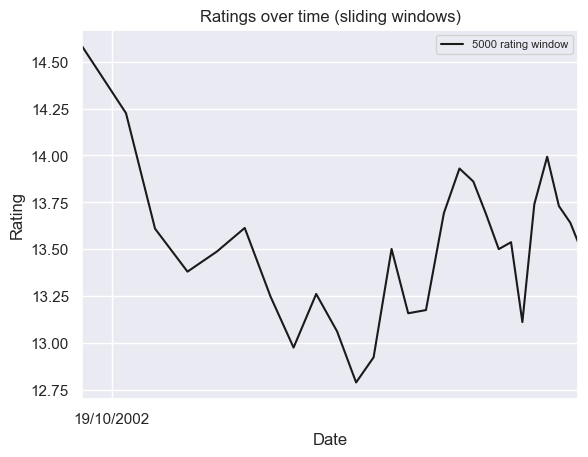

In [70]:
plt.plot(X[::1000],Y[::1000], label="5000 rating window", color='k')
plt.xticks([X[600], X[-350]], [x[wSize+600].strftime("%d/%m/%Y"), x[-350].strftime("%d/%m/%Y")])
plt.xlim(X[0], X[-1])
plt.ylabel("Rating")
plt.xlabel("Date")
plt.legend(loc="best",fontsize=8)
plt.title("Ratings over time (sliding windows)")
plt.show()

In [11]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

def readJSON(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        d = eval(l)
        if 'beer/name' in l and 'beer/beerId' in l and 'beer/brewerId' in l and 'beer/ABV' in l and 'beer/style' in l and 'review/appearance' in l and 'review/aroma' in l and 'review/palate' in l and 'review/taste' in l and 'review/overall' in l and 'review/time' in l and 'review/profileName' in l and 'review/text' in l:
            beerName = d['beer/name']
            beerId = d['beer/beerId']
            brewerId = d['beer/brewerId']
            abv = float(d['beer/ABV']) if d['beer/ABV'] != '-' else -1
            style = d['beer/style']
            appearance = int(d['review/appearance'].split('/')[0]) / int(d['review/appearance'].split('/')[1])
            aroma = int(d['review/aroma'].split('/')[0]) / int(d['review/aroma'].split('/')[1])
            palate = int(d['review/palate'].split('/')[0]) / int(d['review/palate'].split('/')[1])
            taste = int(d['review/taste'].split('/')[0]) / int(d['review/taste'].split('/')[1])
            overall = int(d['review/overall'].split('/')[0]) / int(d['review/overall'].split('/')[1])
            time = int(d['review/time'])
            profileName = d['review/profileName']
            text = d['review/text']
            yield beerName, beerId, brewerId, abv, style, appearance, aroma, palate, taste, overall, time, profileName, text

In [13]:
dataset = []
for beerName, beerId, brewerId, abv, style, appearance, aroma, palate, taste, overall, time, profileName, text in readJSON("ratebeer.json.gz"):
        d = {}
        d['beer/name'] = beerName
        d['beer/beerId'] = beerId
        d['beer/brewerId'] = brewerId
        d['beer/ABV'] = abv
        d['beer/style'] = style
        d['review/appearance'] = appearance
        d['review/aroma'] = aroma
        d['review/palate'] = palate
        d['review/taste'] = taste
        d['review/overall'] = overall
        d['review/time'] = time
        d['review/profileName'] = profileName
        d['review/text'] = text
        dataset.append(d)

In [14]:
dataset[0]

{'beer/name': 'John Harvards Simcoe IPA',
 'beer/beerId': '63836',
 'beer/brewerId': '8481',
 'beer/ABV': 5.4,
 'beer/style': 'India Pale Ale &#40;IPA&#41;',
 'review/appearance': 0.8,
 'review/aroma': 0.6,
 'review/palate': 0.8,
 'review/taste': 0.7,
 'review/overall': 0.65,
 'review/time': 1157241600,
 'review/profileName': 'TomDecapolis',
 'review/text': 'On tap at the John Harvards in Springfield PA.  Pours a ruby red amber with a medium off whie creamy head that left light lacing.  Aroma of orange and various other citrus.  A little light for what I was expecting from this beers aroma...expecting more from the Simcoe.  Flavor of pine, orange, grapefruit and some malt balance.  Very light bitterness for the 80+ IBUs they said this one had.'}

In [15]:
X = [[1, len(d['review/text'])] for d in dataset]
y = [d['review/overall'] >= 4 for d in dataset]

In [16]:
len(dataset)

2924162

In [17]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(dataset)

# Selecting numeric fields for analysis
numeric_fields = ['review/appearance', 'review/palate', 'review/taste', 'beer/ABV', 'review/overall', 'review/aroma']

# Calculating basic statistics
statistics = df[numeric_fields].describe()

print(statistics)

       review/appearance  review/palate  review/taste      beer/ABV  \
count       2.924162e+06   2.924162e+06  2.924162e+06  2.924162e+06   
mean        6.864053e-01   6.514471e-01  6.451929e-01  6.278538e+00   
std         1.625114e-01   1.659463e-01  1.622889e-01  2.781428e+00   
min         2.000000e-01   2.000000e-01  1.000000e-01 -1.000000e+00   
25%         6.000000e-01   6.000000e-01  6.000000e-01  5.000000e+00   
50%         6.000000e-01   6.000000e-01  7.000000e-01  5.800000e+00   
75%         8.000000e-01   8.000000e-01  8.000000e-01  8.000000e+00   
max         1.000000e+00   1.000000e+00  1.000000e+00  5.770000e+01   

       review/overall  review/aroma  
count    2.924162e+06  2.924162e+06  
mean     6.599848e-01  6.353608e-01  
std      1.676290e-01  1.639165e-01  
min      5.000000e-02  1.000000e-01  
25%      6.000000e-01  6.000000e-01  
50%      7.000000e-01  7.000000e-01  
75%      7.500000e-01  7.000000e-01  
max      1.000000e+00  1.000000e+00  


In [18]:
df.head()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,0.8,0.6,0.8,0.7,0.65,1157241600,TomDecapolis,On tap at the John Harvards in Springfield PA....
1,John Harvards Cristal Pilsner,71716,8481,5.0,Bohemian Pilsener,0.8,0.5,0.6,0.6,0.70,958694400,PhillyBeer2112,"UPDATED: FEB 19, 2003 Springfield, PA. I've ne..."
2,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,0.4,0.4,0.4,0.4,0.40,1157587200,TomDecapolis,On tap the Springfield PA location billed as t...
3,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,0.4,0.4,0.4,0.4,0.40,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
4,John Harvards Vanilla Black Velvet Stout,31544,8481,-1.0,Sweet Stout,1.0,0.8,0.8,0.7,0.80,1077753600,egajdzis,"Springfield, PA location... Poured an opaque b..."


In [19]:
sns.set()

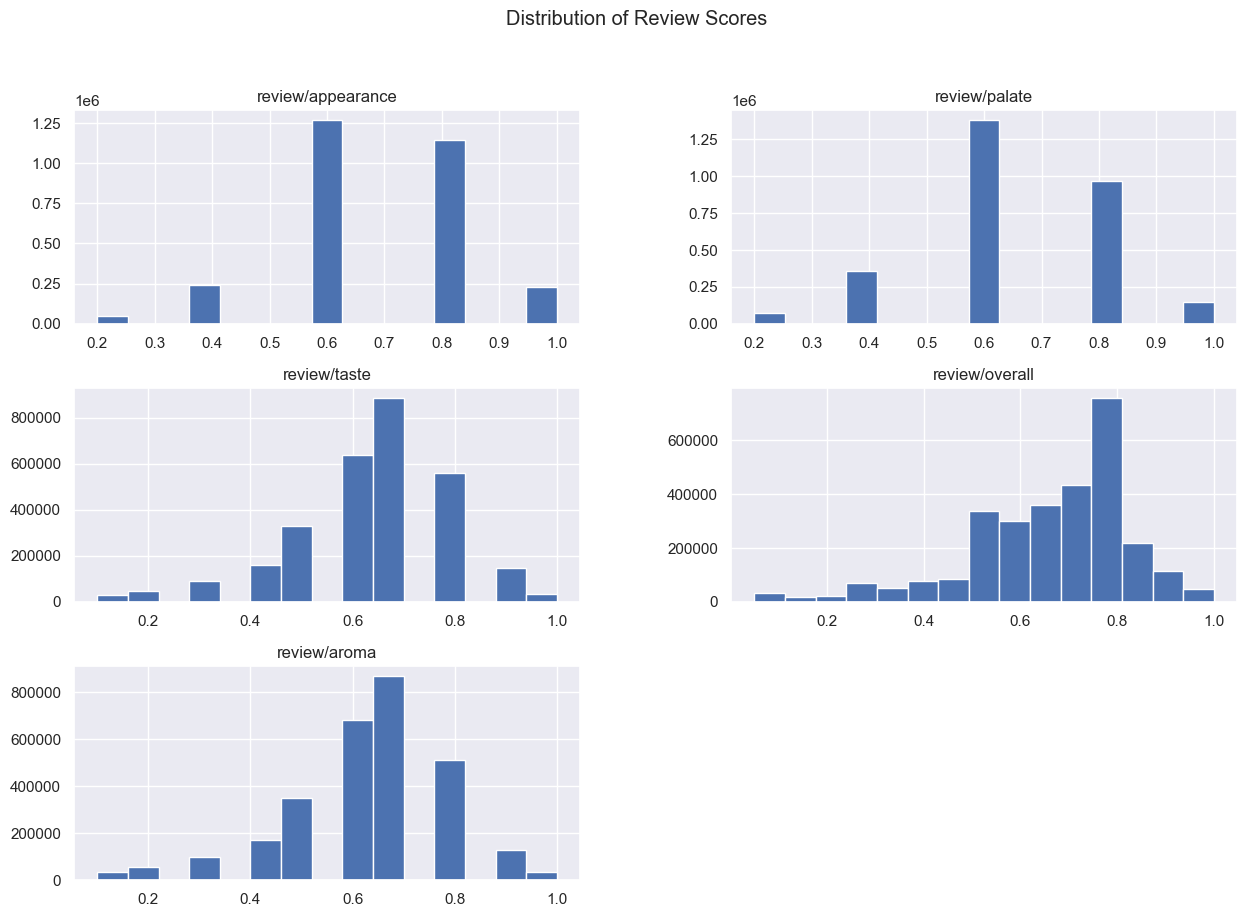

In [20]:
review_fields = ['review/appearance', 'review/palate', 'review/taste', 'review/overall', 'review/aroma']

# Plotting histograms
df[review_fields].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Review Scores')
plt.show()

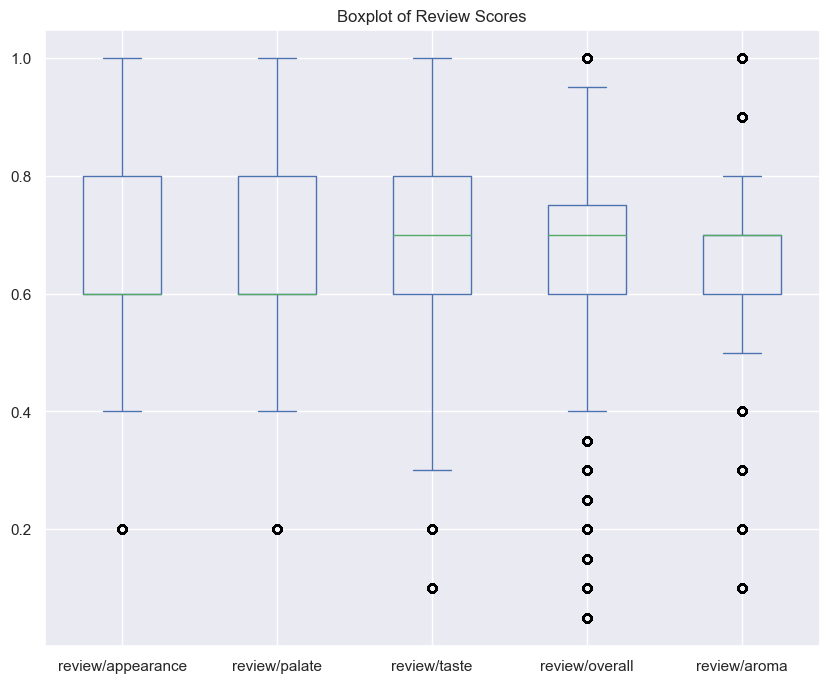

In [21]:
# Plotting boxplots
df[review_fields].plot(kind='box', figsize=(10, 8))
plt.title('Boxplot of Review Scores')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


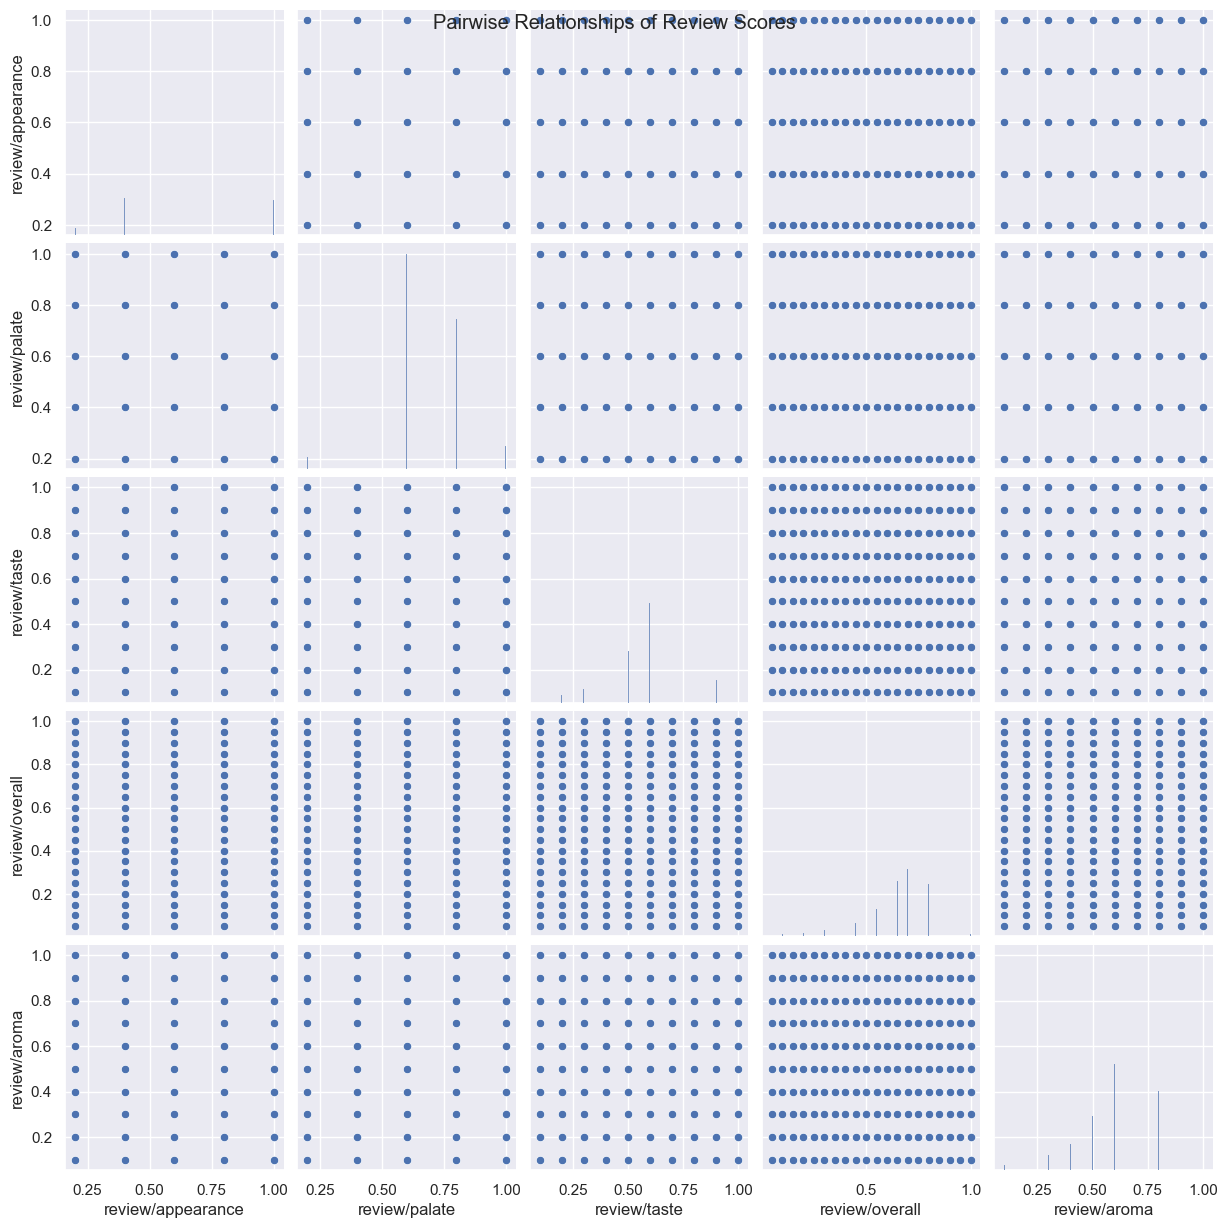

In [22]:
# Pairplot to show pairwise relationships
sns.pairplot(df[review_fields])
plt.suptitle('Pairwise Relationships of Review Scores')
plt.show()

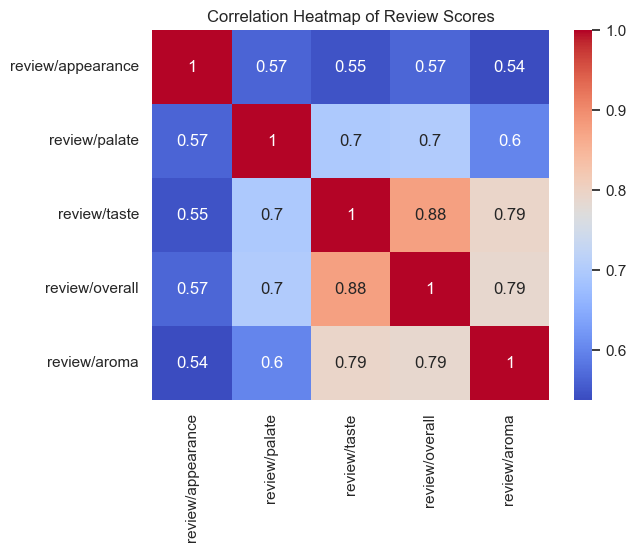

In [23]:
# Correlation heatmap
correlation = df[review_fields].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Review Scores')
plt.show()

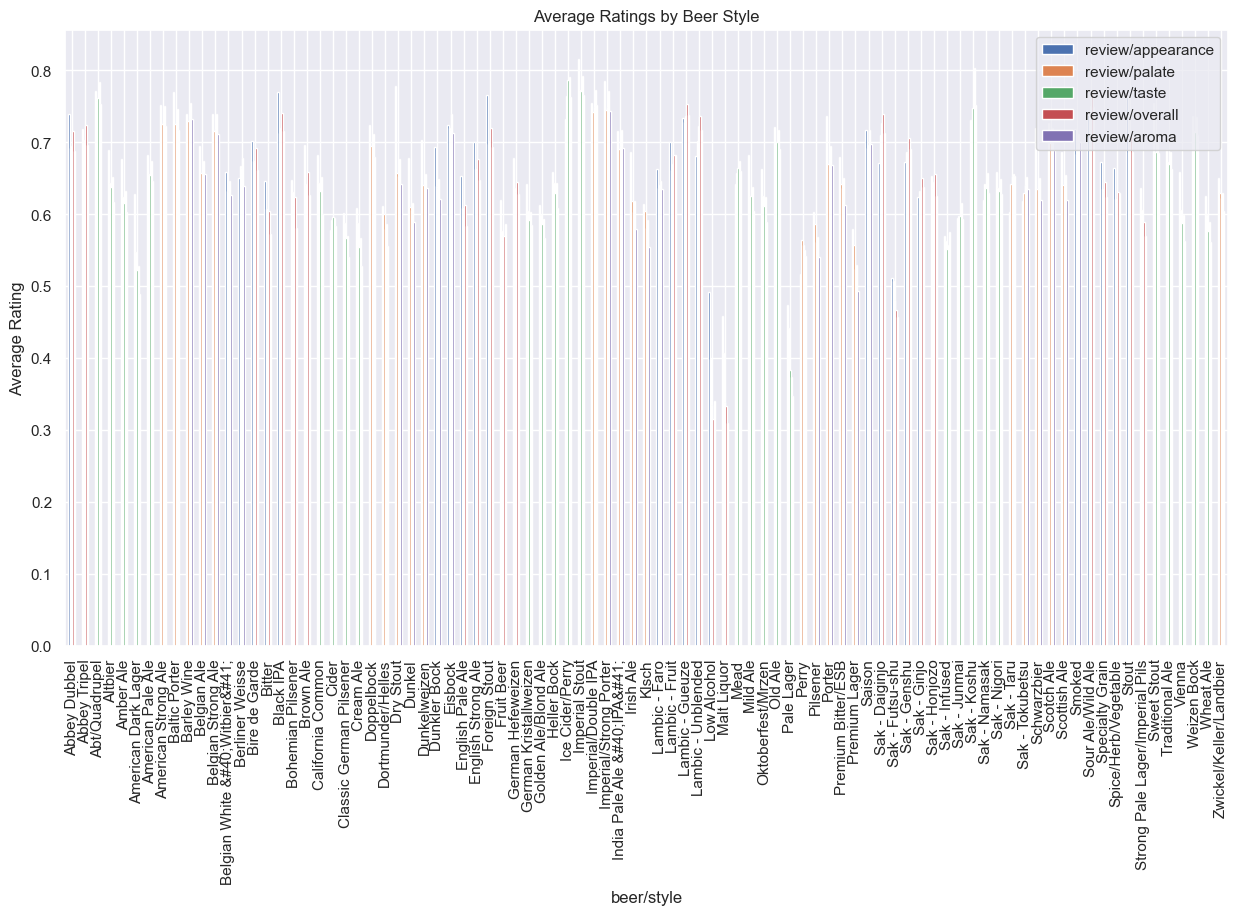

In [24]:
# Average rating by beer style
style_ratings = df.groupby('beer/style')[review_fields].mean()

# Plotting
style_ratings.plot(kind='bar', figsize=(15, 8), title='Average Ratings by Beer Style')
plt.ylabel('Average Rating')
plt.show()

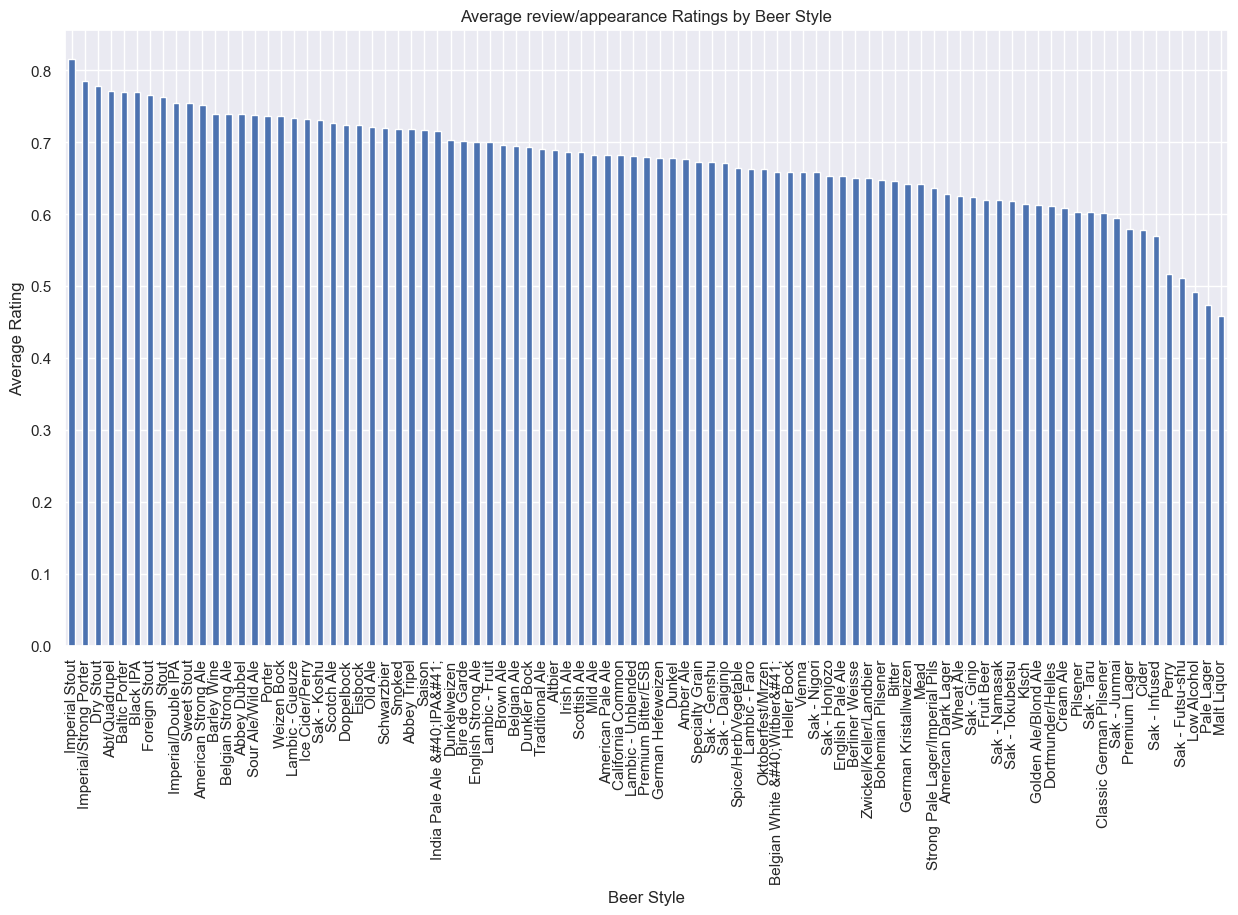

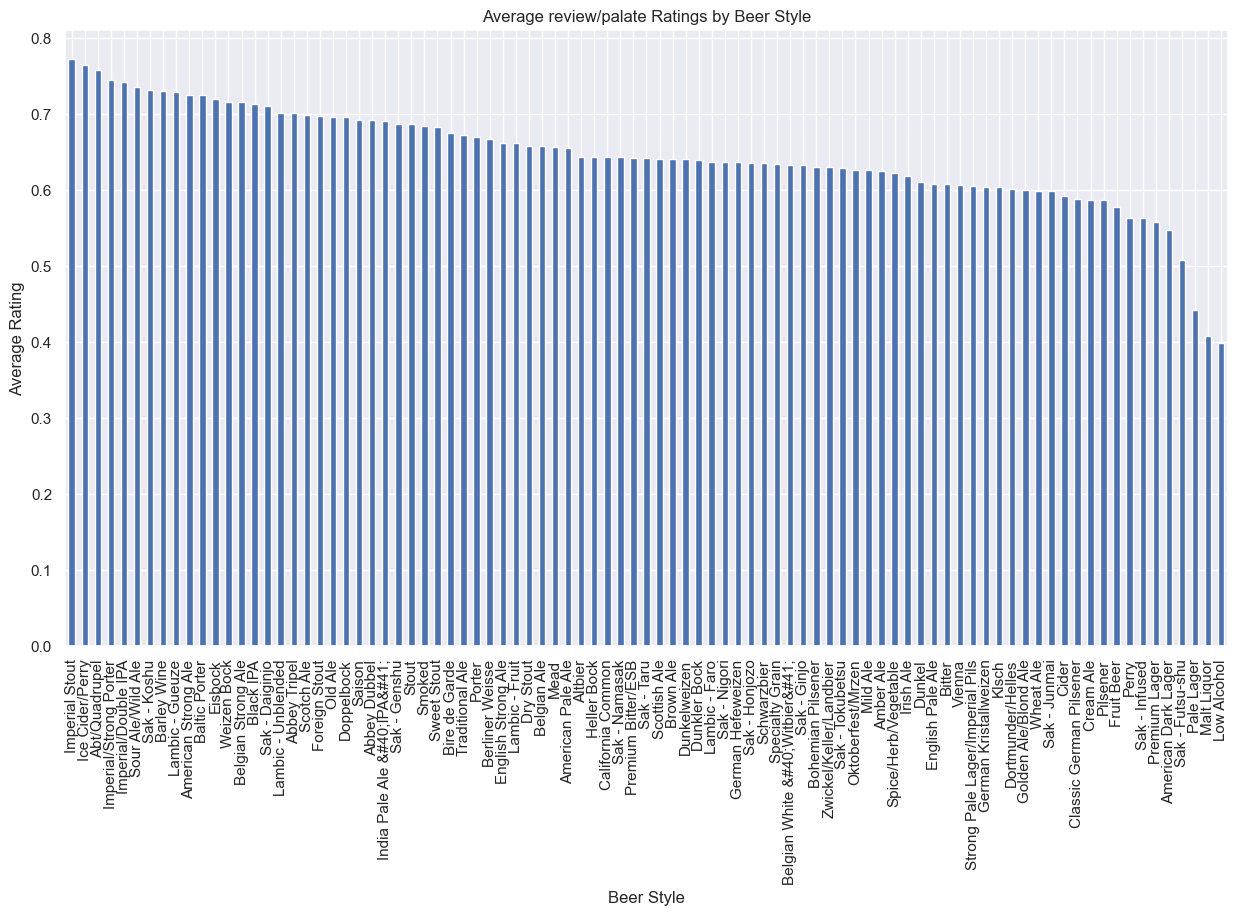

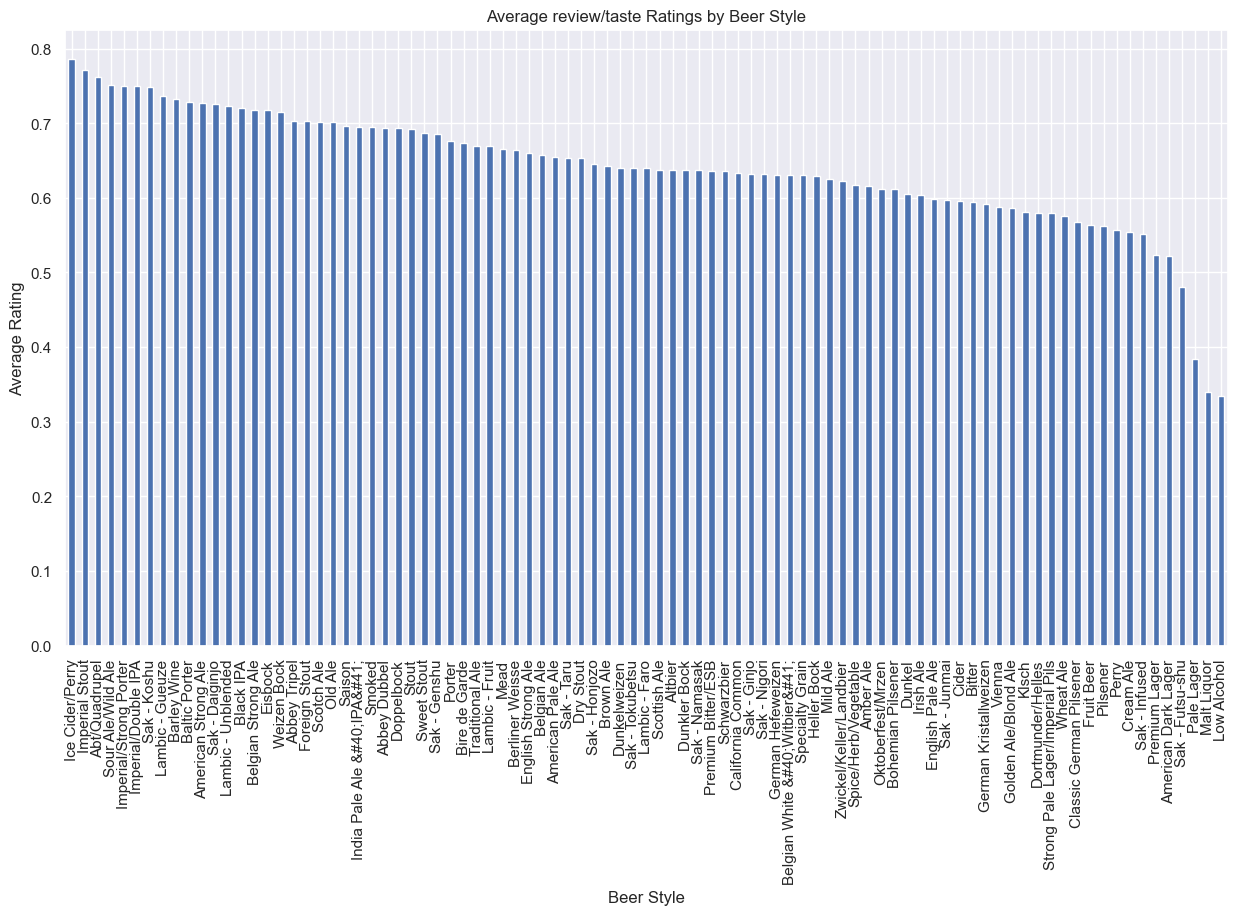

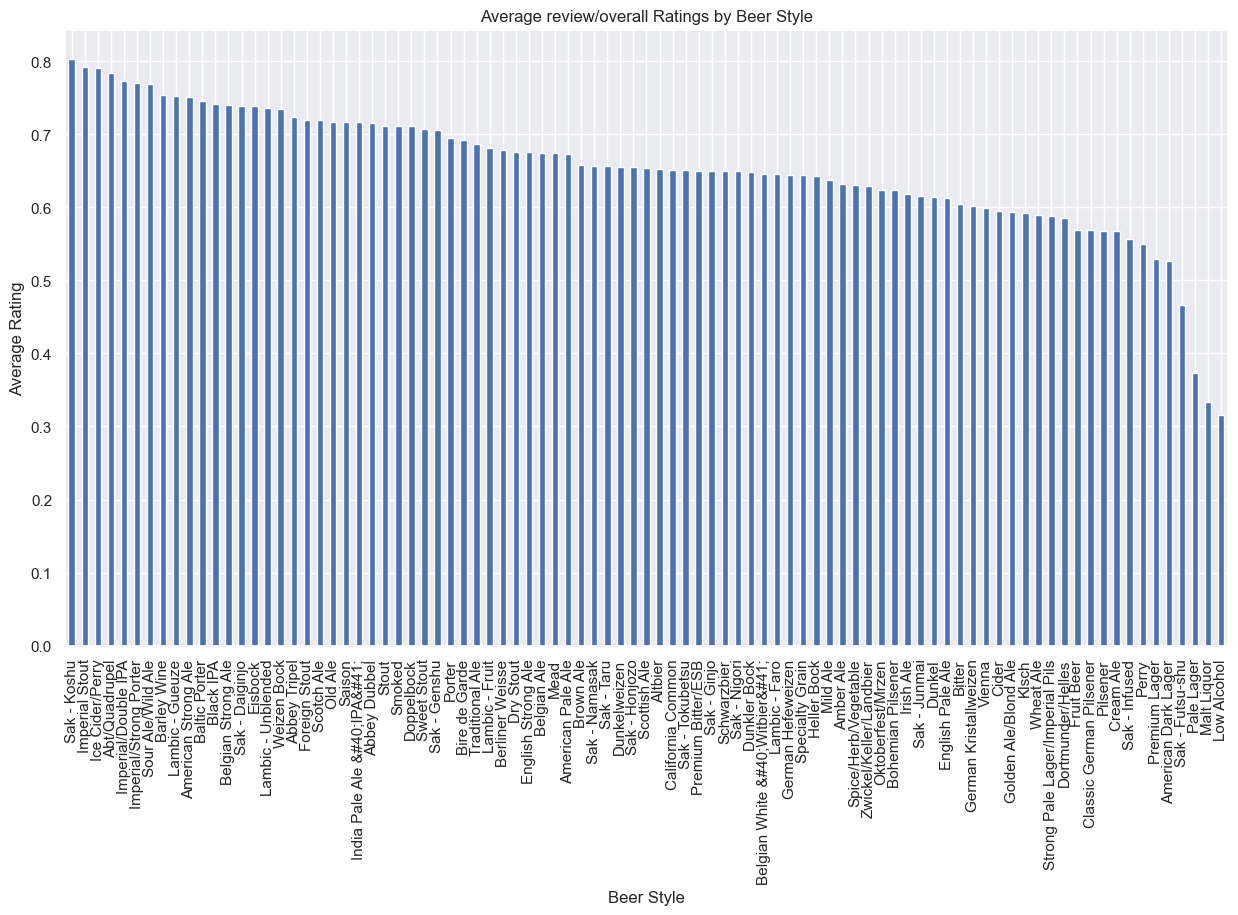

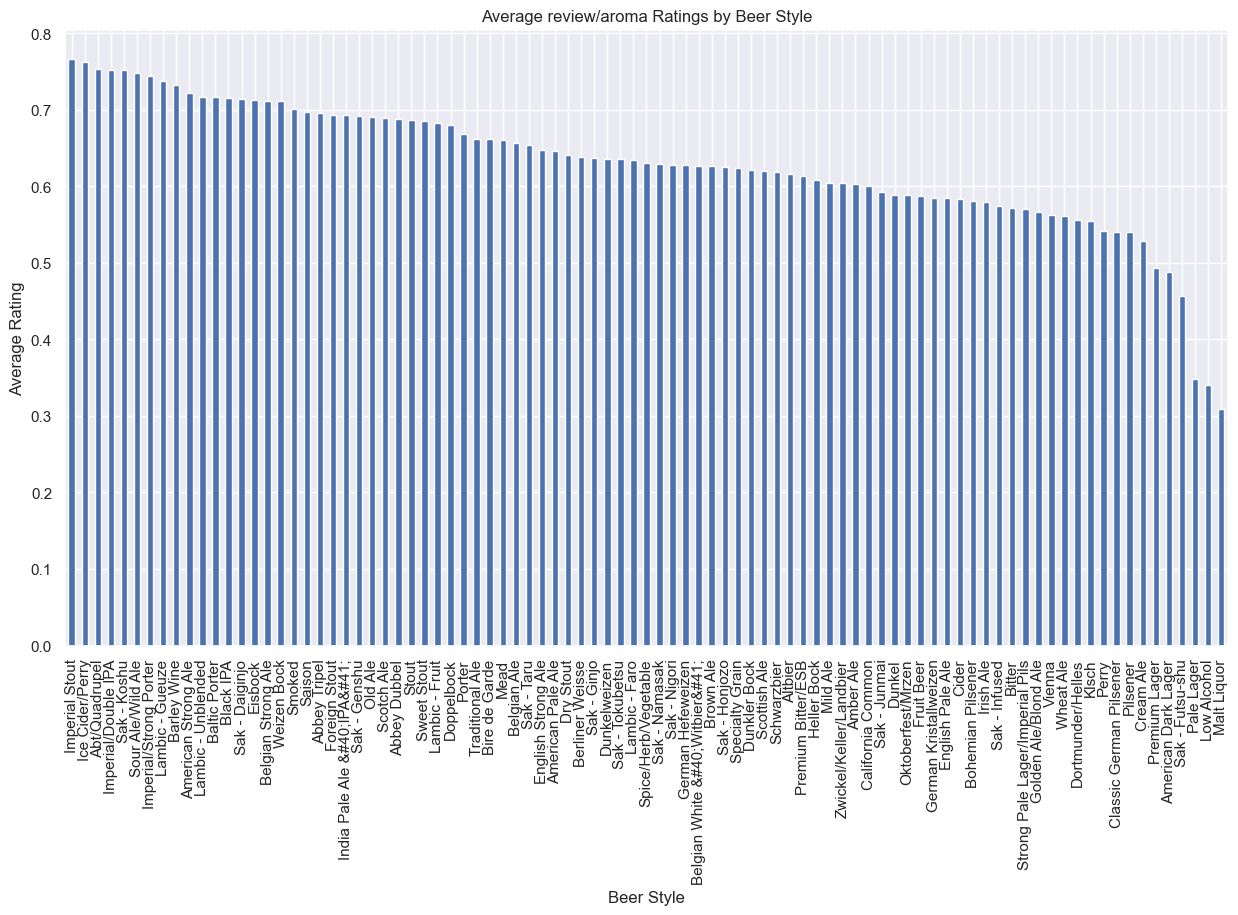

In [25]:
for field in review_fields:
    plt.figure(figsize=(15, 8))
    style_ratings[field].sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Average {field} Ratings by Beer Style')
    plt.ylabel('Average Rating')
    plt.xlabel('Beer Style')
    plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
    plt.show()

In [26]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to the review text
df['sentiment'] = df['review/text'].apply(get_sentiment)

# Plotting sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=50, alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Extracting most frequent words
words = nltk.word_tokenize(' '.join(df['review/text'].dropna().values))
words = [word.lower() for word in words if word.isalpha()]  # Removing punctuation and making lowercase
word_freq = Counter(words)

# Plotting most common words
common_words = word_freq.most_common(20)
words, frequencies = zip(*common_words)
plt.figure(figsize=(15, 8))
plt.bar(words, frequencies)
plt.title('Top 20 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/yueyin/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/share/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


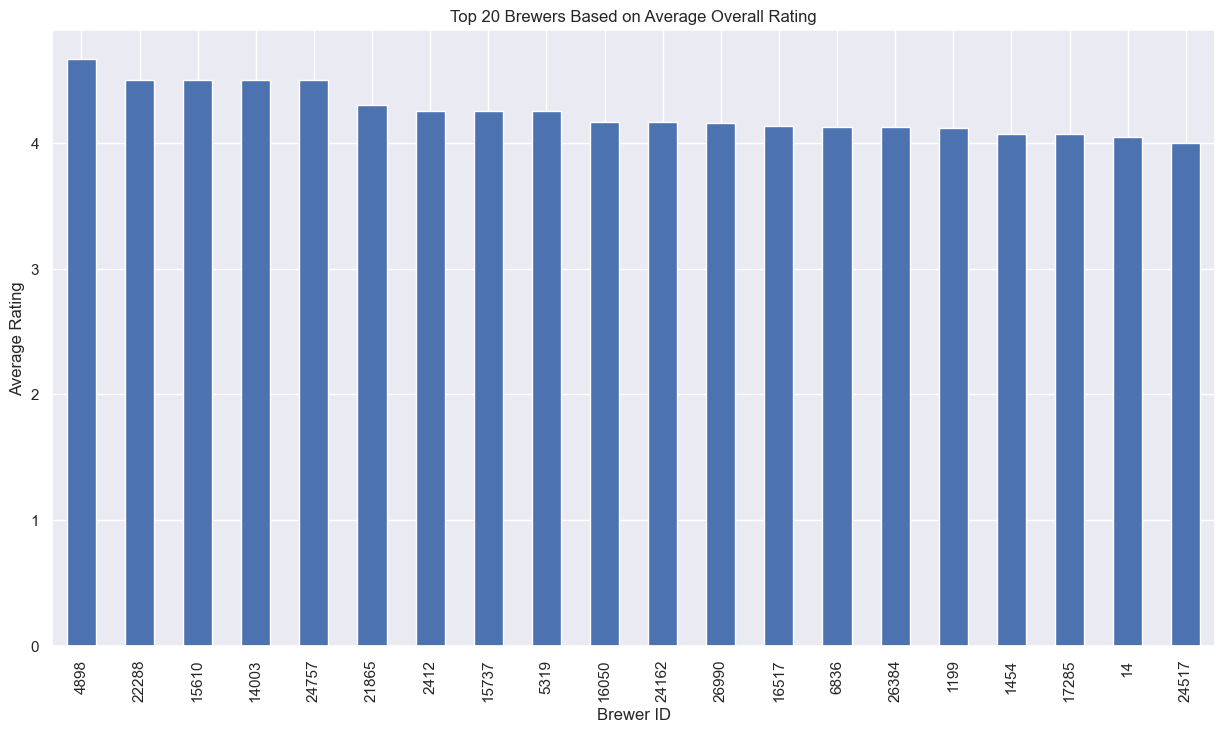

In [ ]:
# Group by brewer ID and calculate the average ratings
avg_ratings_by_brewer = df.groupby('beer/brewerId')['review/overall'].mean().sort_values(ascending=False)

# Plotting the top 20 brewers
plt.figure(figsize=(15, 8))
avg_ratings_by_brewer.head(20).plot(kind='bar')
plt.title('Top 20 Brewers Based on Average Overall Rating')
plt.xlabel('Brewer ID')
plt.ylabel('Average Rating')
plt.show()


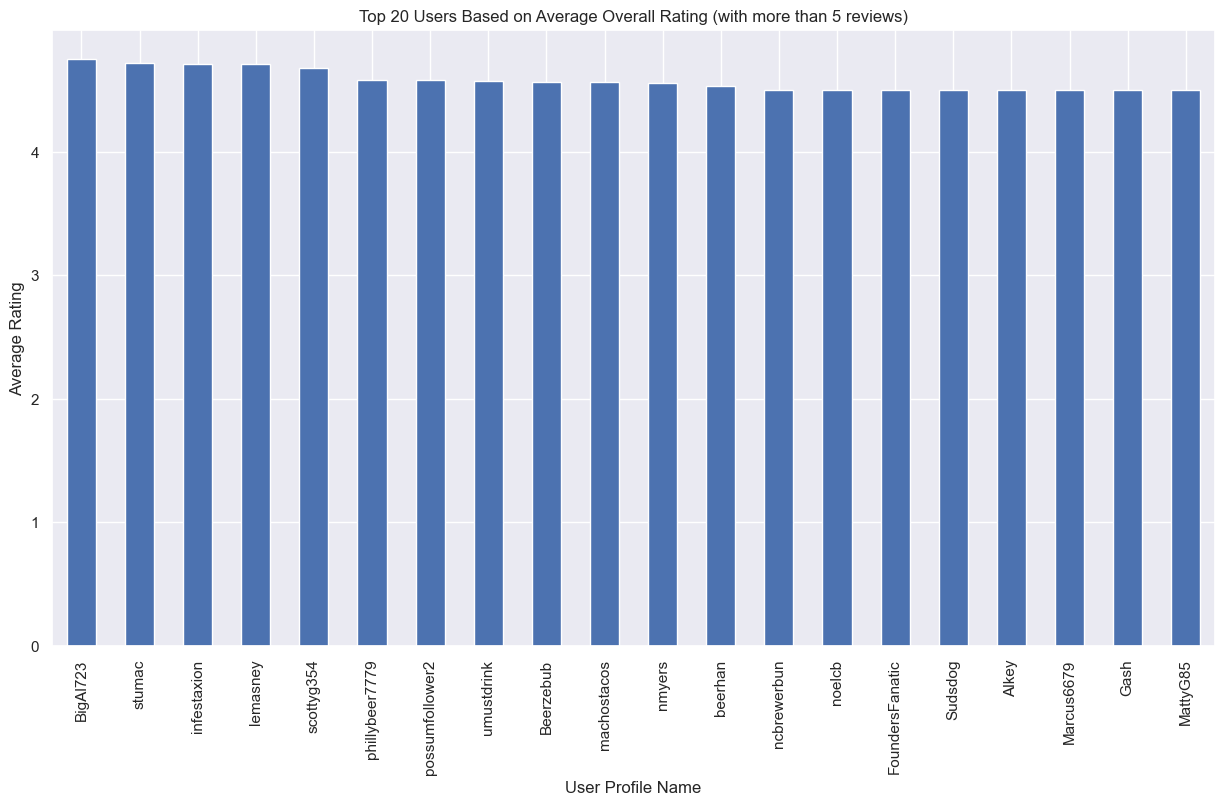

In [ ]:
# Group by user profile name and calculate mean and count of reviews
user_review_stats = df.groupby('user/profileName')['review/overall'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

# You might want to filter out users with very few reviews to get a more reliable average
filtered_users = user_review_stats[user_review_stats['count'] > 5]

# Display top 20 users
plt.figure(figsize=(15, 8))
filtered_users['mean'].head(20).plot(kind='bar')
plt.title('Top 20 Users Based on Average Overall Rating (with more than 5 reviews)')
plt.xlabel('User Profile Name')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
def convert_to_timestamp(row):
    time_struct = row['review/timeStruct']
    review_datetime = datetime(year=time_struct['year'], month=time_struct['mon'], day=time_struct['mday'],
                               hour=time_struct['hour'], minute=time_struct['min'], second=time_struct['sec'])
    return review_datetime.timestamp()

# Apply the function to each row and create a new column 'timestamp'
df['timestamp'] = df.apply(convert_to_timestamp, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataset
train_data, test_val_data = train_test_split(dataset, test_size=0.3)
val_data, test_data = train_test_split(test_val_data, test_size=0.5)

# This will split the data into 70% training, 15% validation, and 15% testing


In [ ]:
df.sort_values(by='timestamp', inplace=True)


In [ ]:
earliestTime = df['timestamp'].min()

# Calculate the time difference in hours
df['hour_diff'] = (df['timestamp'] - earliestTime) // (60*60)

# Count the events per hour
hourly_counts = df.groupby('hour_diff').size()

# If you want the result as a dictionary
hourly_dict = hourly_counts.to_dict()



In [ ]:
def feature(row, hourly_counts):
    hour = row['hour_diff']
    features = []
    for i in [1,2,3,4,5,24,24*7,24*7*365]:
        previousHour = hour - i
        previousHourCount = hourly_counts.get(previousHour, 0)
        features.append(previousHourCount)
    return features

# Assuming 'hourly_counts' is a Series or dictionary where keys are hours and values are counts
# And assuming 'df' is your DataFrame with a 'hour_diff' column

# Apply the feature function to each row
df['features'] = df.apply(lambda row: feature(row, hourly_counts), axis=1)


In [ ]:
df.head()

,review/appearance,beer/style,review/palate,review/taste,beer/name,review/timeUnix,beer/ABV,beer/beerId,beer/brewerId,review/timeStruct,...,user/profileName,review/aroma,user/gender,user/birthdayRaw,user/birthdayUnix,user/ageInSeconds,sentiment,timestamp,hour_diff,features
14780,4.0,American Barleywine,4.5,4.5,Blunderbuss Barley Wine,926294401,11.5,510,14,"{'isdst': 0, 'mday': 10, 'hour': 0, 'min': 0, ...",...,BeerAdvocate,4.0,NaN,NaN,NaN,NaN,0.9062,926319601.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0]"
14427,3.5,Extra Special / Strong Bitter (ESB),3.5,4.0,Bitchin' Special Bitter,926294401,4.7,508,14,"{'isdst': 0, 'mday': 10, 'hour': 0, 'min': 0, ...",...,BeerAdvocate,3.5,NaN,NaN,NaN,NaN,0.5740,926319601.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0]"
14425,3.5,American Stout,3.5,4.0,Beantowne Espresso Stout,926294401,5.6,511,14,"{'isdst': 0, 'mday': 10, 'hour': 0, 'min': 0, ...",...,BeerAdvocate,4.0,NaN,NaN,NaN,NaN,0.4276,926319601.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0]"
14058,3.0,BiÃ¨re de Garde,3.5,3.5,Biere De Garde,926294401,8.0,509,14,"{'isdst': 0, 'mday': 10, 'hour': 0, 'min': 0, ...",...,BeerAdvocate,3.5,NaN,NaN,NaN,NaN,0.8126,926319601.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0]"
14288,4.5,Scotch Ale / Wee Heavy,4.0,4.5,Bannatyne's Scotch Ale,940723201,9.2,454,14,"{'isdst': 0, 'mday': 24, 'hour': 0, 'min': 0, ...",...,BeerAdvocate,4.0,NaN,NaN,NaN,NaN,0.9174,940748401.0,4008.0,"[0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
# Assuming 'hourly_counts' is a Series or dictionary where keys are hours and values are counts
# 'feature' function is as you defined earlier

# Create feature vectors (X)
X = [feature(hour, hourly_counts) for hour in sorted(hourly_counts.keys())]

# Create target values (y)
y = [hourly_counts[hour] for hour in sorted(hourly_counts.keys())]

model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X, y)
theta = model.coef_

TypeError: 'float' object is not subscriptable

In [ ]:
theta